In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

taxiDB = pd.read_csv('taxi_dataset.csv')

In [154]:
taxiDB.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


<dl>
<dt> Описание колонок:
<dd>id - ID поездки </dd>
<dd>vendor_id - ID компании, осуществляющей перевозку </dd>
<dd>pickup_datetime - Таймкод начала поездки</dd>
<dd>dropoff_datetime - Таймкод конца поездки </dd>
<dd>passenger_count - Количество пассажиров </dd>
<dd>pickup_longitude - Долгота точки, в которой началась поездка </dd>
<dd>pickup_latitude - Широта точки, в которой началась поездка </dd>
<dd>dropoff_longitude - Долгота точки, в которой закончилась поездка </dd>
<dd>dropoff_latitude - Широта точки, в которой закончилась поездка </dd>
<dd>store_and_fwd_flag - Yes/No: Была ли информация сохранена в памяти транспортного средства из-за потери соединения с сервером </dd>
</dl>

**Наша целевая переменная - длительность поездки.**

Зная тайм-коды времени начала и конца поездок, можем вычислить обозначенный таргет
Договоримся, что производим вычисления в секундах.
Советуем обратить внимание на  <a href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">данный способ</a> для перевода строки в datetime тип, с которым удобно работать при вычленении дней/часов...

И <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.total_seconds.html"> этот </a>для перевода разницы datetime объектов в секунды

Положите таргетную переменнул в столбик с названием **trip_duration**

In [155]:
### Your code is here
taxiDB['trip_duration'] = pd.to_datetime(taxiDB['dropoff_datetime']) - pd.to_datetime(taxiDB['pickup_datetime'])

In [156]:
taxiDB['trip_duration'] = taxiDB['trip_duration'].dt.total_seconds()

In [157]:
taxiDB.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


Предсказывая таргет для новых объектов в будущем, мы не будем заранее знать **dropoff_datetime**.

Удалим колонку из датасета.

In [158]:
### Your code is here
taxiDB = taxiDB.drop("dropoff_datetime", axis=1)

In [159]:
taxiDB['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [160]:
taxiDB['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


**В будущем будем строить модель. На каких признаках? Рассмотрим имеющиеся вещественные/бинарные и обсудим, какие простейшие признаки можно вытащить из остальных колонок.**

Во-первых, имеем бинарный признак vendor_id, принимающий значения {1, 2}. Переведем его во множество {0, 1}, так как это просто привычнее.

In [161]:
taxiDB['vendor_id'] = taxiDB['vendor_id'] - 1
taxiDB.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


Найдите еще один бинарный признак в данном датасете. Закодируйте и его тоже во множество {0, 1}.

In [162]:
### Your code is here
taxiDB.loc[(taxiDB['store_and_fwd_flag'] == 'N'), 'store_and_fwd_flag'] = 0
taxiDB.loc[(taxiDB['store_and_fwd_flag'] == 'Y'), 'store_and_fwd_flag'] = 1

In [163]:
taxiDB['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [164]:
taxiDB.loc[0:9].to_csv('file.csv', sep=';')

In [165]:
###Сохраните первые 10 строк получившегося на этом этапе датафрейма в csv файл с разделителем ';'. Прикрепите в качестве ответа к заданию 5.

Во-вторых, можем использовать долготу и широту точек старта/завершения поездки, чтобы примерно оценить расстояние между 2 точками.

Сами по себе они, как самостоятельные вещественные признаки, вряд ли способны хорошо объяснять длительность поездки.

Базовая идея состоит в том, чтобы посчитать разность долгот и широт соответственно, то есть:

$$
\delta_{long} = \text{dropoff_longitude} - \text{pickup_longitude}
$$

$$
\delta_{lat} =  \text{dropoff_latitude} - \text{pickup_latitude}
$$

А потом вычислить географическое расстояние между 2 точками по теореме Пифагора:

$$
R = \sqrt{\delta^2_{long} + \delta^2_{lat}}
$$

Мы реализуем данную задумку и вычислим такую вещественную колонку **R**, что, в целом, является хорошим тоном при работе с координатами точек.

Только для начала нужно некоторым образом перевести долготу и широту в километры, обеспечив равенство их мер измерения. Потому что, вообще говоря, *градусная мера* широт и долгот имеет неодинаковую шкалу перевода в километры. Так, если пропустить данную деталь, расстояние **R** будет вычислено неверно, ведь катеты тогда будут иметь разную размерность.

В целом, перевод из долгот и широт в расстояние поездки позволяет нам в будущем проверить зависимость **длительности поездки от километража**, и объяснить ее будет куда проще, чем аналогичную между таргетом и изначальными признаками

<a href="https://www.datafix.com.au/BASHing/2018-11-07.html"> Маленькая статья про перевод разницы градусов долгот/широт в километры</a>

**Начнем переводить каждую долготу в некоторое относительно километровое выражение**

Соберем список из всех широт (как точек старта, так и конца).

In [166]:
allLat  = list(taxiDB['pickup_latitude']) + list(taxiDB['dropoff_latitude'])

Посчитаем медиану:

Это некоторое "Центральное значение" в отсортированном массиве всех значений.

Иными словами, такое число, меньше и больше которого примерно равное количество объектов.

In [167]:
medianLat  = sorted(allLat)[int(len(allLat)/2)]

Теперь, для из каждого значения широты вычтем медианное значение.

Результат переведем в километры.

In [168]:
latMultiplier  = 111.32

taxiDB['pickup_latitude']   = latMultiplier  * (taxiDB['pickup_latitude']   - medianLat)
taxiDB['dropoff_latitude']   = latMultiplier  * (taxiDB['dropoff_latitude']  - medianLat)

In [169]:
taxiDB.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,1.516008,-73.964630,1.256121,0,455.0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,-1.753813,-73.999481,-2.578912,0,663.0
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,1.070973,-74.005333,-4.923841,0,2124.0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,-3.823568,-74.012268,-5.298809,0,429.0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,4.329328,-73.972923,3.139453,0,435.0


Итого, для **latitude** колонок получили следующие выражения:

*На сколько примерно километров севернее или южнее (в зависимости от знака) точка находится относительно средней широты*

In [170]:
allLong = list(taxiDB['pickup_longitude']) + list(taxiDB['dropoff_longitude'])

medianLong  = sorted(allLong)[int(len(allLong)/2)]

longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32

Используя полученную медиану и множитель, на который стоит корректировать все долготы, получите корректные **longitude** признаки по аналогии.

In [171]:
### Your code is here
taxiDB['pickup_longitude']   = longMultiplier  * (taxiDB['pickup_longitude']   - medianLong)
taxiDB['dropoff_longitude']   = longMultiplier  * (taxiDB['dropoff_longitude']  - medianLong)

Почему мы вычисляли через медианы: они позволяют нам во время вычисления расстояния преобразовать изначальные longtitude/latitude колонки в "отдаленности точек старта/конца поездок" от медианных точек. Кажется, что это прикольно :) Есть подозрение, что медианная для поездок точка города - это, на практике, точка скопления вечерних пробок. Нам может быть вполне важно знать, насколько далеко от такого эпицентра ужаса мы начинаем и заканчиваем поездку (насколько севернее/южнее/...) и выделить поверх этой информации дополнительные признаки.<br>
В домашнем задании это использоваться не будет, но это ещё один пример, как можно работать с признаками.

Наконец, вычислим географическое расстояние **distance_km**:

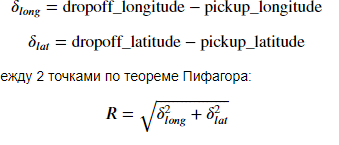

In [172]:
### Your code is here
sigma_long = taxiDB['dropoff_longitude']-taxiDB['pickup_longitude']
sigma_lat = taxiDB['dropoff_latitude']-taxiDB['pickup_latitude']
taxiDB["distance_km"] = (sigma_long.pow(2)+sigma_lat.pow(2)).pow(0.5)

In [173]:
taxiDB.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,2016-03-14 17:24:55,1,-0.110015,1.516008,1.367786,1.256121,0,455.0,1.500479
1,id2377394,0,2016-06-12 00:43:35,1,0.036672,-1.753813,-1.571088,-2.578912,0,663.0,1.807119
2,id3858529,1,2016-01-19 11:35:24,1,0.153763,1.070973,-2.064547,-4.923841,0,2124.0,6.392080
3,id3504673,1,2016-04-06 19:32:31,1,-2.461500,-3.823568,-2.649362,-5.298809,0,429.0,1.487155
4,id2181028,1,2016-03-26 13:30:55,1,0.657515,4.329328,0.668452,3.139453,0,435.0,1.189925


Уберем старые признаки!

In [174]:
taxiDB = taxiDB.drop(['pickup_longitude', 'dropoff_longitude',
                      'pickup_latitude', 'dropoff_latitude'], axis=1)

In [175]:
taxiDB.head()

,id,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,2016-03-14 17:24:55,1,0,455.0,1.500479
1,id2377394,0,2016-06-12 00:43:35,1,0,663.0,1.807119
2,id3858529,1,2016-01-19 11:35:24,1,0,2124.0,6.392080
3,id3504673,1,2016-04-06 19:32:31,1,0,429.0,1.487155
4,id2181028,1,2016-03-26 13:30:55,1,0,435.0,1.189925


In [176]:
### Cохраните первые 10 значений полученного промежуточного датафрейма в файл в формате csv с сепаратором ;. Отправьте полученный файл в форму ответа к заданию 6.
taxiDB.loc[0:9].to_csv('file.csv', sep=';')

В-третьих, обратим внимание на колонку **passenger_count**.

Какие значения она может принимать?

In [177]:
### Your code is here
taxiDB['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
8          1
9          1
Name: passenger_count, dtype: int64

In [178]:
taxiDB.head()

,id,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,2016-03-14 17:24:55,1,0,455.0,1.500479
1,id2377394,0,2016-06-12 00:43:35,1,0,663.0,1.807119
2,id3858529,1,2016-01-19 11:35:24,1,0,2124.0,6.392080
3,id3504673,1,2016-04-06 19:32:31,1,0,429.0,1.487155
4,id2181028,1,2016-03-26 13:30:55,1,0,435.0,1.189925


Какой это признак, на ваш взгляд: вещественный, категориальный, порядковый? 

С одной стороны, можно воспринимать его как обычный вещественный признак. Ведь само по себе количество пассажиров (без дополнительной обработки) - это некоторое число, которое может принимать большое количество различных значений.

С другой стороны, мы с Вами наверняка знаем, что количество пассажиров от поездки к поездке ограничено. Вряд ли если к нам придут новые данные, мы увидим числа бОльшие, чем у нас в датасете. Тогда рассуждаем следующим образом: раз множество значений признака ограничено, то он категориальный (или, в данном случае, даже порядковый! Ведь у нас могут быть какие-то логичные предположения о том, что количество пассажиров может влиять на модель машины и, соответственно, скорость ее передвижения и скорость поездки!)

Какой подход выбрать лучше заранее наверняка не узнаешь. Нужны эксперименты с данными и моделями. Тем не менее, я предлагаю Вам предположить, что данный признак является категориальным, и попробовать отточить навыки кодировки таких фичей!

Предлагаю Вам реализовать прием с **Mean-target encoding'ом**, как в практическом занятии. Замените колонку **passenger_count** колонкой **category_encoded**.

In [193]:
taxiDB['category_encoded'] = taxiDB['passenger_count'].map(taxiDB.groupby('passenger_count')['trip_duration'].mean())
taxiDB = taxiDB.drop(['passenger_count'], axis=1)

In [194]:
### Your code is here
taxiDB

,id,vendor_id,pickup_datetime,store_and_fwd_flag,trip_duration,distance_km,category_encoded
0,id2875421,1,2016-03-14 17:24:55,0,455.0,1.500479,930.399753
1,id2377394,0,2016-06-12 00:43:35,0,663.0,1.807119,930.399753
2,id3858529,1,2016-01-19 11:35:24,0,2124.0,6.392080,930.399753
3,id3504673,1,2016-04-06 19:32:31,0,429.0,1.487155,930.399753
4,id2181028,1,2016-03-26 13:30:55,0,435.0,1.189925,930.399753
...,...,...,...,...,...,...,...
1458639,id2376096,1,2016-04-08 13:31:04,0,778.0,1.226296,1053.529749
1458640,id1049543,0,2016-01-10 07:35:15,0,655.0,6.056935,930.399753
1458641,id2304944,1,2016-04-22 06:57:41,0,764.0,7.832952,930.399753
1458642,id2714485,0,2016-01-05 15:56:26,0,373.0,1.093786,930.399753


In [195]:
taxiDB['category_encoded'].describe()

count    1.458644e+06
mean     9.594923e+02
std      4.792768e+01
min      1.966667e+01
25%      9.303998e+02
50%      9.303998e+02
75%      1.005458e+03
max      1.718433e+03
Name: category_encoded, dtype: float64

In [197]:
###  Cохраните первые 10 значений полученного промежуточного датафрейма в файл в формате csv с сепаратором ';' Отправьте полученный файл в форму ответа задания 7.
taxiDB.loc[0:9].to_csv('file.csv', sep=';')

Кажется, мы достаточно близки с Вами к тому, чтобы получить в итоге табличку, полностью состояющую из чиселок и, казалось бы, осмысленных признаков!

Остались две колонки: **id**, **pickup_datetime**

**id** можно использовать как обычный идентификатор нашего объекта, поэтому поместите данную колонку в качестве индекса нашей таблички:

In [198]:
taxiDB.head()

,id,vendor_id,pickup_datetime,store_and_fwd_flag,trip_duration,distance_km,category_encoded
0,id2875421,1,2016-03-14 17:24:55,0,455.0,1.500479,930.399753
1,id2377394,0,2016-06-12 00:43:35,0,663.0,1.807119,930.399753
2,id3858529,1,2016-01-19 11:35:24,0,2124.0,6.392080,930.399753
3,id3504673,1,2016-04-06 19:32:31,0,429.0,1.487155,930.399753
4,id2181028,1,2016-03-26 13:30:55,0,435.0,1.189925,930.399753


In [199]:
taxiDB = taxiDB.set_index('id')

In [200]:
taxiDB.head()

,vendor_id,pickup_datetime,store_and_fwd_flag,trip_duration,distance_km,category_encoded
id,,,,,,
id2875421,1,2016-03-14 17:24:55,0,455.0,1.500479,930.399753
id2377394,0,2016-06-12 00:43:35,0,663.0,1.807119,930.399753
id3858529,1,2016-01-19 11:35:24,0,2124.0,6.392080,930.399753
id3504673,1,2016-04-06 19:32:31,0,429.0,1.487155,930.399753
id2181028,1,2016-03-26 13:30:55,0,435.0,1.189925,930.399753


In [ ]:
###Сохраните первые 10 000 значений полученного датафрейма в файл в формате csv с сепаратором ';' Отправьте полученный файл в форму задания 8.

In [203]:
taxiDB.head(10000).to_csv('file.csv', sep=';')